temp_0.vl.json
__temp__/temp_0.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'gene', 'value_1': 3.6623, 'value_2': 0.335},
                     {'KEY': 'gene', 'value_1': 2.5681, 'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'KEY', 'type': 'nominal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_1.vl.json
__temp__/temp_1.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'gene', 'value_1': 3.6623, 'value_2': 0.335},
                     {'KEY': 'gene', 'value_1': 2.5681, 'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'KEY', 'type': 'nominal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


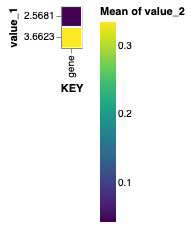

temp_10.vl.json
__temp__/temp_10.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'VALUE': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'nominal'},
              'y': {'field': 'VALUE', 'type': 'nominal'}},
 'mark': 'rect'}


temp_11.vl.json
__temp__/temp_11.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'VALUE': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'nominal'},
              'y': {'field': 'VALUE', 'type': 'nominal'}},
 'mark': 'rect'}


temp_12.vl.json
__temp__/temp_12.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'VALUE': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'ordinal'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'VALUE', 'type': 'nominal'}},
 'mark': 'rect'}


temp_13.vl.json
__temp__/temp_13.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'VALUE': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'ordinal'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'VALUE', 'type': 'nominal'}},
 'mark': 'rect'}


temp_14.vl.json
__temp__/temp_14.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'VALUE': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'VALUE', 'type': 'nominal'}},
 'mark': 'rect'}


temp_15.vl.json
__temp__/temp_15.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'VALUE': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'VALUE', 'type': 'nominal'}},
 'mark': 'rect'}


temp_16.vl.json
__temp__/temp_16.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'gene', 'VALUE': 'XLOC_000060', 'value_1': 3.6623},
                     {'KEY': 'gene',
                      'VALUE': 'XLOC_000074',
                      'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'nominal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_17.vl.json
__temp__/temp_17.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'gene', 'VALUE': 'XLOC_000060', 'value_1': 3.6623},
                     {'KEY': 'gene',
                      'VALUE': 'XLOC_000074',
                      'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'KEY', 'type': 'nominal'},
              'y': {'field': 'VALUE', 'type': 'nominal'}},
 'mark': 'rect'}


temp_18.vl.json
__temp__/temp_18.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'gene', 'VALUE': 'XLOC_000060', 'value_2': 0.335},
                     {'KEY': 'gene',
                      'VALUE': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'nominal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


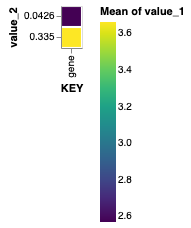

temp_19.vl.json
__temp__/temp_19.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'gene', 'VALUE': 'XLOC_000060', 'value_2': 0.335},
                     {'KEY': 'gene',
                      'VALUE': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'KEY', 'type': 'nominal'},
              'y': {'field': 'VALUE', 'type': 'nominal'}},
 'mark': 'rect'}


temp_2.vl.json
__temp__/temp_2.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'gene', 'value_1': 3.6623, 'value_2': 0.335},
                     {'KEY': 'gene', 'value_1': 2.5681, 'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'nominal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_20.vl.json
__temp__/temp_20.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'KEY', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_21.vl.json
__temp__/temp_21.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1',
                      'gene': 'XLOC_000060',
                      'value_2': 0.335},
                     {'KEY': 'value_1',
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_22.vl.json
__temp__/temp_22.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 3.6623, 'gene': 'XLOC_000060', 'value_2': 0.335},
                     {'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_23.vl.json
__temp__/temp_23.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 3.6623, 'gene': 'XLOC_000060', 'value_2': 0.335},
                     {'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_24.vl.json
__temp__/temp_24.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 3.6623, 'gene': 'XLOC_000060', 'value_2': 0.335},
                     {'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_25.vl.json
__temp__/temp_25.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 3.6623, 'gene': 'XLOC_000060', 'value_2': 0.335},
                     {'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'VALUE', 'type': 'nominal'}},
 'mark': 'rect'}


temp_26.vl.json
__temp__/temp_26.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 3.6623, 'gene': 'XLOC_000060', 'value_2': 0.335},
                     {'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'ordinal'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_27.vl.json
__temp__/temp_27.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 3.6623, 'gene': 'XLOC_000060', 'value_2': 0.335},
                     {'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'ordinal'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_28.vl.json
__temp__/temp_28.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 3.6623, 'gene': 'XLOC_000060', 'value_2': 0.335},
                     {'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_29.vl.json
__temp__/temp_29.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 3.6623, 'gene': 'XLOC_000060', 'value_2': 0.335},
                     {'VALUE': 2.5681,
                      'gene': 'XLOC_000074',
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_3.vl.json
__temp__/temp_3.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'gene', 'value_1': 3.6623, 'value_2': 0.335},
                     {'KEY': 'gene', 'value_1': 2.5681, 'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'nominal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_30.vl.json
__temp__/temp_30.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1', 'VALUE': 3.6623, 'gene': 'XLOC_000060'},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074'}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'KEY', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


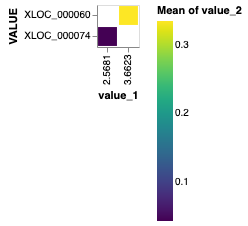

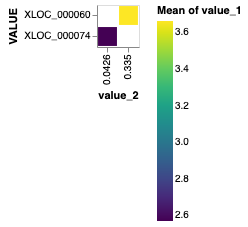

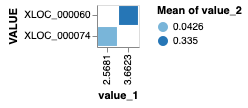

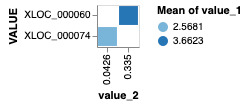

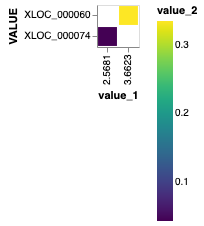

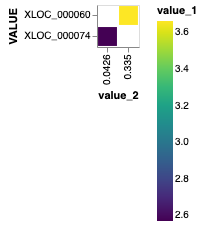

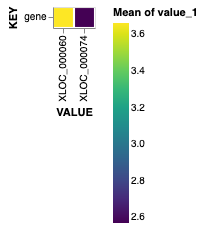

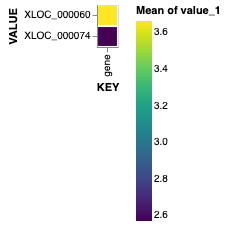

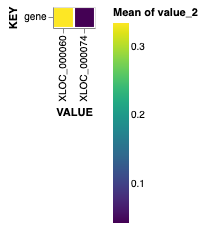

temp_31.vl.json
__temp__/temp_31.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1', 'VALUE': 3.6623, 'gene': 'XLOC_000060'},
                     {'KEY': 'value_1',
                      'VALUE': 2.5681,
                      'gene': 'XLOC_000074'}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_32.vl.json
__temp__/temp_32.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1', 'VALUE': 3.6623, 'value_2': 0.335},
                     {'KEY': 'value_1', 'VALUE': 2.5681, 'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'KEY', 'type': 'nominal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


temp_33.vl.json
__temp__/temp_33.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1', 'VALUE': 3.6623, 'value_2': 0.335},
                     {'KEY': 'value_1', 'VALUE': 2.5681, 'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'nominal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_34.vl.json
__temp__/temp_34.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1', 'VALUE': 3.6623, 'value_2': 0.335},
                     {'KEY': 'value_1', 'VALUE': 2.5681, 'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'nominal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_35.vl.json
__temp__/temp_35.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1', 'VALUE': 3.6623, 'value_2': 0.335},
                     {'KEY': 'value_1', 'VALUE': 2.5681, 'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'KEY', 'type': 'nominal'},
              'y': {'field': 'VALUE', 'type': 'nominal'}},
 'mark': 'rect'}


temp_36.vl.json
__temp__/temp_36.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1', 'VALUE': 3.6623, 'value_2': 0.335},
                     {'KEY': 'value_1', 'VALUE': 2.5681, 'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'ordinal'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_37.vl.json
__temp__/temp_37.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1', 'VALUE': 3.6623, 'value_2': 0.335},
                     {'KEY': 'value_1', 'VALUE': 2.5681, 'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'ordinal'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_38.vl.json
__temp__/temp_38.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1', 'VALUE': 3.6623, 'value_2': 0.335},
                     {'KEY': 'value_1', 'VALUE': 2.5681, 'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_39.vl.json
__temp__/temp_39.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_1', 'VALUE': 3.6623, 'value_2': 0.335},
                     {'KEY': 'value_1', 'VALUE': 2.5681, 'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_4.vl.json
__temp__/temp_4.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'gene', 'value_1': 3.6623, 'value_2': 0.335},
                     {'KEY': 'gene', 'value_1': 2.5681, 'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'ordinal'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_40.vl.json
__temp__/temp_40.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_2',
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623},
                     {'KEY': 'value_2',
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'KEY', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_41.vl.json
__temp__/temp_41.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_2',
                      'gene': 'XLOC_000060',
                      'value_1': 3.6623},
                     {'KEY': 'value_2',
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_42.vl.json
__temp__/temp_42.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 0.335, 'gene': 'XLOC_000060', 'value_1': 3.6623},
                     {'VALUE': 0.0426,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_43.vl.json
__temp__/temp_43.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 0.335, 'gene': 'XLOC_000060', 'value_1': 3.6623},
                     {'VALUE': 0.0426,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_44.vl.json
__temp__/temp_44.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 0.335, 'gene': 'XLOC_000060', 'value_1': 3.6623},
                     {'VALUE': 0.0426,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_45.vl.json
__temp__/temp_45.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 0.335, 'gene': 'XLOC_000060', 'value_1': 3.6623},
                     {'VALUE': 0.0426,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'VALUE', 'type': 'nominal'}},
 'mark': 'rect'}


temp_46.vl.json
__temp__/temp_46.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 0.335, 'gene': 'XLOC_000060', 'value_1': 3.6623},
                     {'VALUE': 0.0426,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'ordinal'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_47.vl.json
__temp__/temp_47.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 0.335, 'gene': 'XLOC_000060', 'value_1': 3.6623},
                     {'VALUE': 0.0426,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'ordinal'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_48.vl.json
__temp__/temp_48.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 0.335, 'gene': 'XLOC_000060', 'value_1': 3.6623},
                     {'VALUE': 0.0426,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_49.vl.json
__temp__/temp_49.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 0.335, 'gene': 'XLOC_000060', 'value_1': 3.6623},
                     {'VALUE': 0.0426,
                      'gene': 'XLOC_000074',
                      'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_5.vl.json
__temp__/temp_5.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'gene', 'value_1': 3.6623, 'value_2': 0.335},
                     {'KEY': 'gene', 'value_1': 2.5681, 'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'ordinal'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_50.vl.json
__temp__/temp_50.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_2', 'VALUE': 0.335, 'gene': 'XLOC_000060'},
                     {'KEY': 'value_2',
                      'VALUE': 0.0426,
                      'gene': 'XLOC_000074'}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'KEY', 'type': 'nominal'},
              'y': {'field': 'gene', 'type': 'nominal'}},
 'mark': 'rect'}


temp_51.vl.json
__temp__/temp_51.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_2', 'VALUE': 0.335, 'gene': 'XLOC_000060'},
                     {'KEY': 'value_2',
                      'VALUE': 0.0426,
                      'gene': 'XLOC_000074'}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'gene', 'type': 'nominal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_52.vl.json
__temp__/temp_52.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_2', 'VALUE': 0.335, 'value_1': 3.6623},
                     {'KEY': 'value_2', 'VALUE': 0.0426, 'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'KEY', 'type': 'nominal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_53.vl.json
__temp__/temp_53.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_2', 'VALUE': 0.335, 'value_1': 3.6623},
                     {'KEY': 'value_2', 'VALUE': 0.0426, 'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'nominal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_54.vl.json
__temp__/temp_54.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_2', 'VALUE': 0.335, 'value_1': 3.6623},
                     {'KEY': 'value_2', 'VALUE': 0.0426, 'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'nominal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_55.vl.json
__temp__/temp_55.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_2', 'VALUE': 0.335, 'value_1': 3.6623},
                     {'KEY': 'value_2', 'VALUE': 0.0426, 'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'KEY', 'type': 'nominal'},
              'y': {'field': 'VALUE', 'type': 'nominal'}},
 'mark': 'rect'}


temp_56.vl.json
__temp__/temp_56.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_2', 'VALUE': 0.335, 'value_1': 3.6623},
                     {'KEY': 'value_2', 'VALUE': 0.0426, 'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'VALUE',
                        'type': 'ordinal'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_57.vl.json
__temp__/temp_57.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_2', 'VALUE': 0.335, 'value_1': 3.6623},
                     {'KEY': 'value_2', 'VALUE': 0.0426, 'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'ordinal'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_58.vl.json
__temp__/temp_58.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_2', 'VALUE': 0.335, 'value_1': 3.6623},
                     {'KEY': 'value_2', 'VALUE': 0.0426, 'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'VALUE',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_59.vl.json
__temp__/temp_59.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'value_2', 'VALUE': 0.335, 'value_1': 3.6623},
                     {'KEY': 'value_2', 'VALUE': 0.0426, 'value_1': 2.5681}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_6.vl.json
__temp__/temp_6.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'gene', 'value_1': 3.6623, 'value_2': 0.335},
                     {'KEY': 'gene', 'value_1': 2.5681, 'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'value_1', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_7.vl.json
__temp__/temp_7.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'KEY': 'gene', 'value_1': 3.6623, 'value_2': 0.335},
                     {'KEY': 'gene', 'value_1': 2.5681, 'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': None,
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'value_2', 'type': 'ordinal'},
              'y': {'field': 'KEY', 'type': 'nominal'}},
 'mark': 'rect'}


temp_8.vl.json
__temp__/temp_8.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'VALUE': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_2',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'nominal'},
              'y': {'field': 'value_1', 'type': 'nominal'}},
 'mark': 'rect'}


temp_9.vl.json
__temp__/temp_9.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'values': [{'VALUE': 'XLOC_000060',
                      'value_1': 3.6623,
                      'value_2': 0.335},
                     {'VALUE': 'XLOC_000074',
                      'value_1': 2.5681,
                      'value_2': 0.0426}]},
 'encoding': {'color': {'aggregate': 'mean',
                        'field': 'value_1',
                        'type': 'quantitative'},
              'x': {'field': 'VALUE', 'type': 'nominal'},
              'y': {'field': 'value_2', 'type': 'nominal'}},
 'mark': 'rect'}


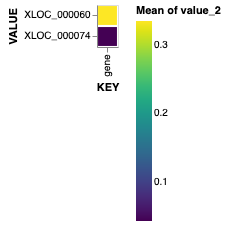

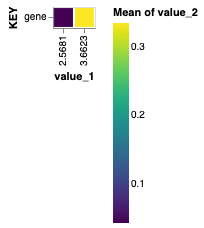

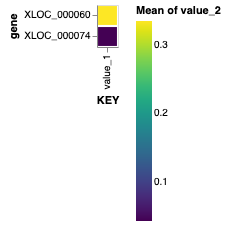

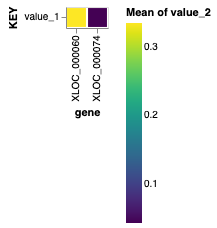

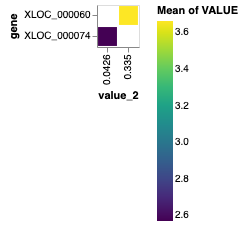

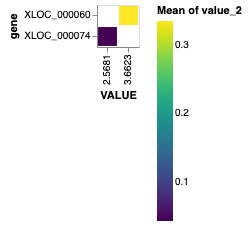

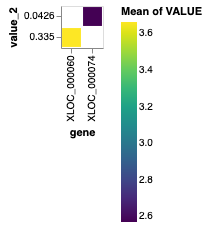

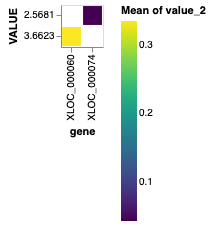

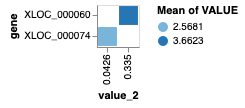

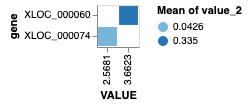

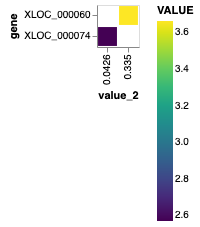

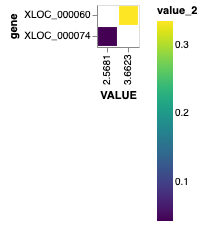

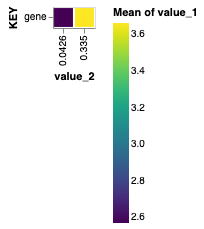

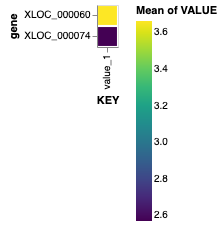

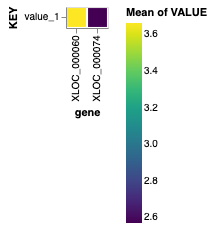

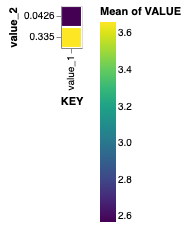

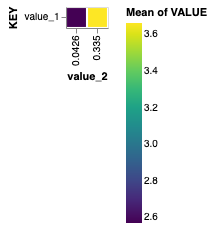

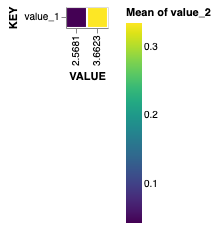

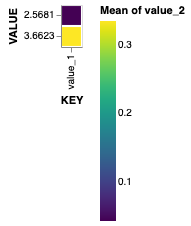

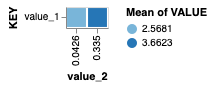

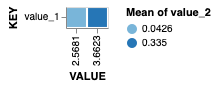

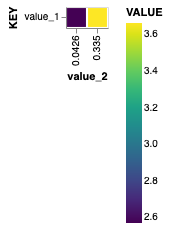

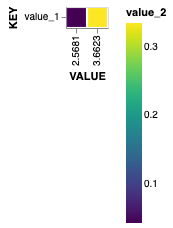

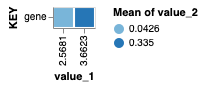

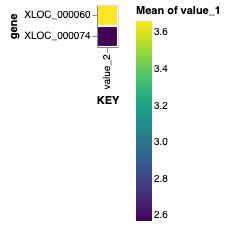

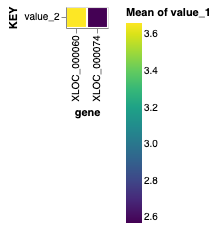

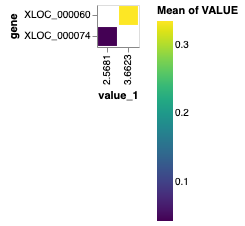

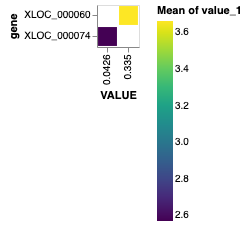

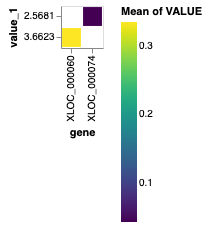

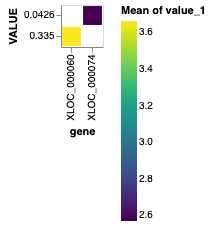

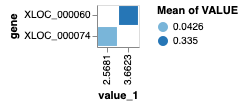

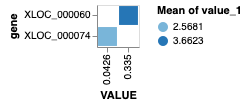

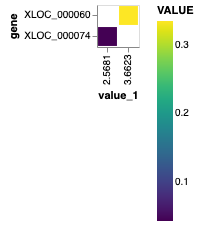

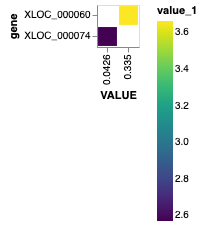

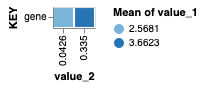

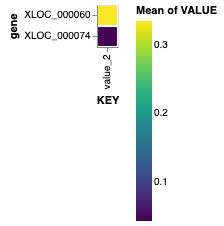

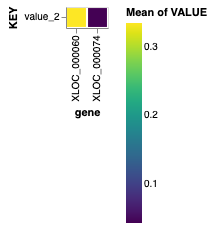

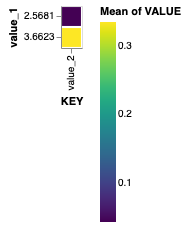

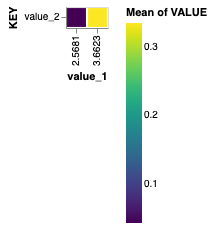

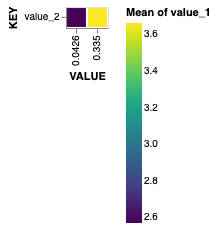

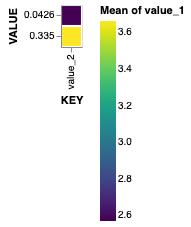

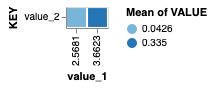

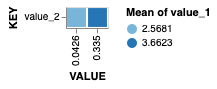

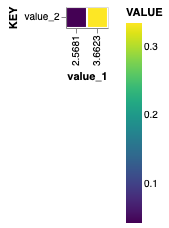

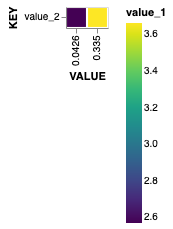

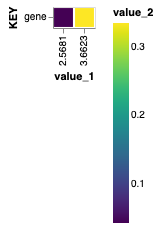

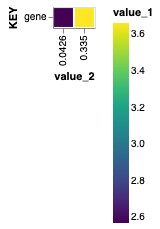

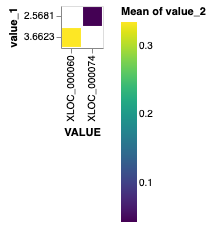

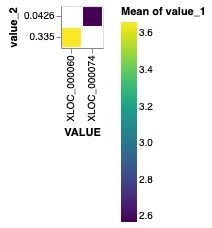

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import json
import os
from pprint import pprint 

from vega import VegaLite

def prepare_spec(input_file):
    print(input_file)
    with open(input_file) as f:
        spec_dir = os.path.dirname(input_file)
        spec = json.load(f)
        pprint(spec)
        # add data directory to the spec to fix relative import
        if "url" in spec["data"]:
            spec["data"]["url"] = os.path.join(spec_dir, spec["data"]["url"])
            print(spec["data"]["url"])
        return VegaLite(spec)

# render all charts in the dir
def render_vegalite_dir(input_dir, max_display=10):
    for i, fname in enumerate(sorted(os.listdir(input_dir))):
        if fname.endswith(".vl.json"):
            print(fname)
            vl = prepare_spec(os.path.join(input_dir, fname))
            vl.display()
    
# the input_file is relative to the notebook
#interact(render_vegalite_dir, input_dir="__temp__");

render_vegalite_dir("__temp__")